In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [16]:
P=50 #poplulation
N=0.8# cross over probability
M=0.20 # muation probability 
pre_best=1
neta=20; # Distribution index for Mutation
mu= 20;  # Distribution index for Crossover
i=0
child =[]

# Intialization

In [17]:
A= np.random.rand(1,50)*360
A=A.astype(int)
A


array([[230,  38,  69, 159, 302, 181, 144, 291, 327,  79, 118, 359,   1,
        141, 332, 331, 131,   7, 147, 266, 315,  12, 163, 210, 183,  68,
         82, 151, 234, 273, 281, 307, 316, 283,  12,   0, 349, 282,  29,
         13, 240, 302,  99, 176,  82, 197,  23, 101,  90, 163]])

In [18]:
#np.sin(A).tolist()[0] list 
my_list=list(zip(A.tolist()[0],np.sin(A*2*np.pi/360).tolist()[0]))
my_list[0:3]

[(230, -0.7660444431189779),
 (38, 0.6156614753256582),
 (69, 0.9335804264972017)]

In [19]:
def plot(A):
    global i
    i=i+1
    y=np.linspace(0,2*np.pi)
    plt.plot(y,np.sin(y))
    plt.xlabel('Genratioin {}'.format(i))
    plt.scatter((A*2*np.pi/360).tolist()[0],np.sin(A*2*np.pi/360).tolist()[0])


# Tornarment_selection

In [20]:
def tornarment_selection(A):
    # select two chromosomes
    p=[]

    for i in range(np.int(N*P)):
        # convert to int 
        temp=(np.random.rand(1,2)*49).astype(int)
        # selected value
        temp.tolist()[0]
        if(np.sin(A[0,temp.tolist()[0][0]]*2*np.pi/360)<np.sin(A[0,temp.tolist()[0][1]]*2*np.pi/360)):
            p.append(A[0,temp.tolist()[0][0]])
        else:
            p.append(A[0,temp.tolist()[0][1]])
   # p=[my_list[key] for key in p]
    return p

In [21]:
p=tornarment_selection(A)
len(p)/2

20.0

#  cross_over

In [22]:
def cross_over(A):
    c=[]
    v=[]
    for i in range(np.int(len(p)/2)):
        p1=A[:,i*2]
        p2=A[:,i*2+1]
        r = (np.random.rand(1))[0]
        if r <=0.5:
            b=(2*r)**(1/(mu+1))
        else:
            b=(1/(2*(1-r)))**(1/(mu+1))
        p1=p[i*2]
        p2 =p[i*2+1]
        c1=0.5*((1+b)*p1+(1-b)*p2)
        c2=0.5*((1-b)*p1+(1+b)*p2)
        
        
        c.append(c1)
        c.append(c2)

        v.append(np.sin((c1*2*np.pi/360)))
        v.append(np.sin(c2*2*np.pi/360))

    child=list(zip(c,v))
    return child
    

# mutation

In [23]:
def mutation(child):
    for i in range(int(M*P)):
        d=0.0
        r=(np.random.rand(1)*N*P).astype(int)[0]
        k=(np.random.rand(1))[0]
        if k<=0.5:
            d=(2*k)**(1/(neta+1))-1
        else:
            d=1-(2*(1-k))**(1/(neta+1))
       # print('r={},k={},d={}'.format(r,k,d))
        
        child[r]=list(child[r])
        child[r][0]=child[r][0]+d
        y=child[r][0]*2*np.pi/360
        child[r][1]=np.sin(y)
    
    

# minimization

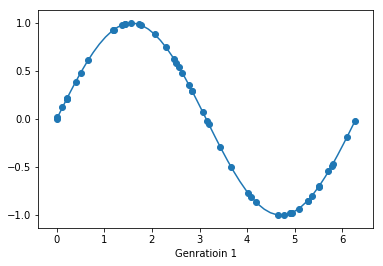

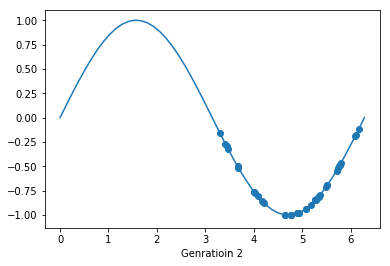

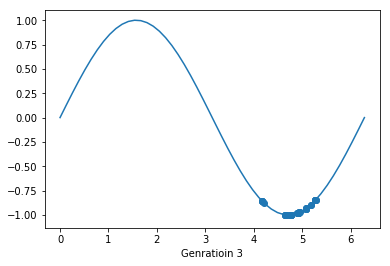

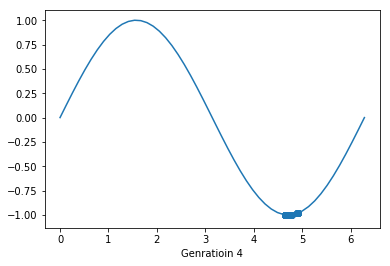

In [24]:

while 1:
    
    
    
    plot(A)
   # plt.savefig('min'+str(i)+'.png')
    global pre_best
    p=tornarment_selection(A)
    child=cross_over(A)
    
    type(child)
    mutation(child)
    my_list=my_list+child
    #sort by value
    my_list.sort(key = lambda t: t[1])

    my_list=my_list[:50]
    A=[my_list[i][0] for i in np.linspace(0,49,dtype=int)]
    A=np.array(A)
    A=A.reshape(1,50)
    
    best =my_list[0][1]
    if  math.fabs(best-pre_best)<0.0000000000000000000000001 or  i>20:
        break;
    else:
   
        pre_best=best
    # Wait for 2 seconds
    plt.show()
    
    
    
 






# maximization

In [29]:
pre_best=0
A= np.random.rand(1,50)*360
A=A.astype(int)
A
#np.sin(A).tolist()[0] list 
my_list=list(zip(A.tolist()[0],np.sin(A*2*np.pi/360).tolist()[0]))
i=0

In [30]:
def tornarment_selection(A):
    # select two chromosomes
    p=[]

    for i in range(np.int(N*P)):
        # convert to int 
        temp=(np.random.rand(1,2)*49).astype(int)
        # selected value
        temp.tolist()[0]
        if(np.sin(A[0,temp.tolist()[0][0]]*2*np.pi/360)>np.sin(A[0,temp.tolist()[0][1]]*2*np.pi/360)):
            p.append(A[0,temp.tolist()[0][0]])
        else:
            p.append(A[0,temp.tolist()[0][1]])
   # p=[my_list[key] for key in p]
    return p

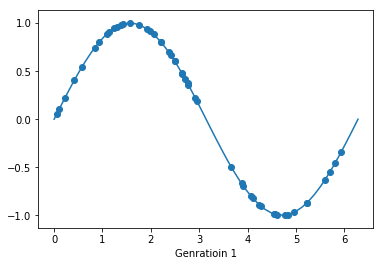

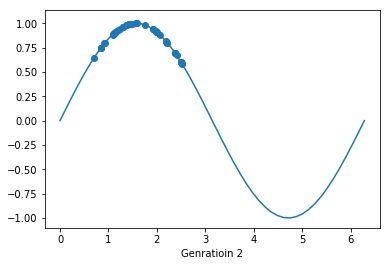

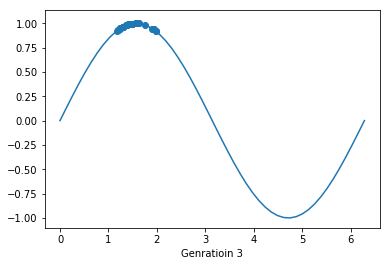

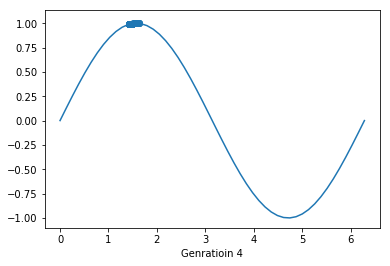

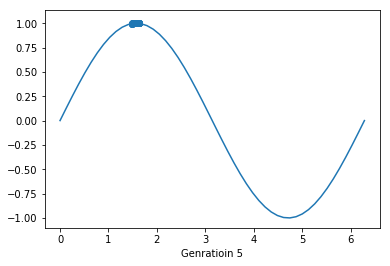

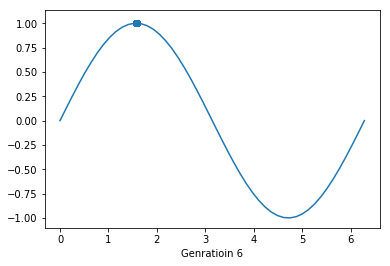

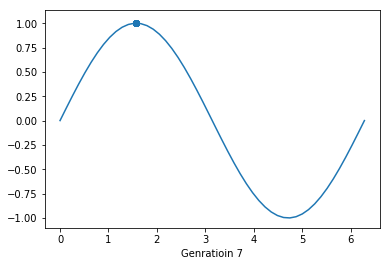

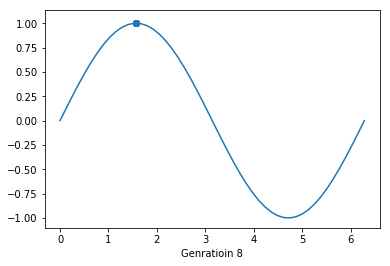

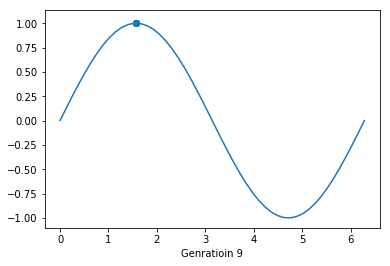

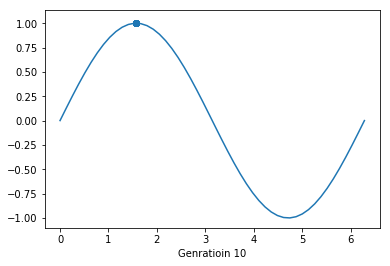

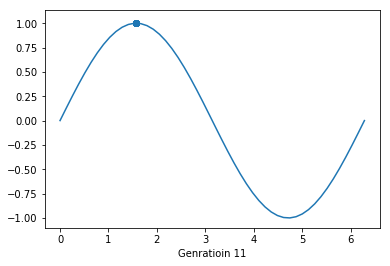

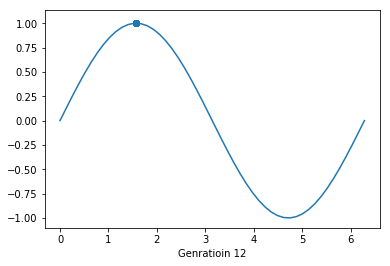

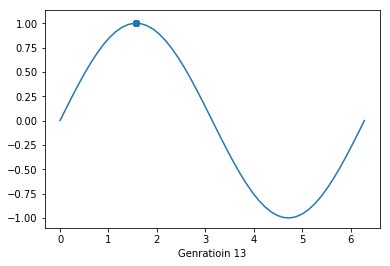

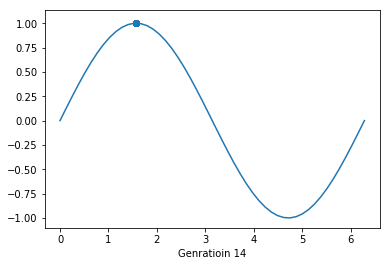

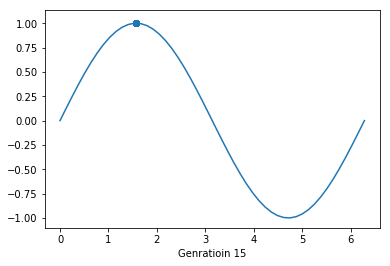

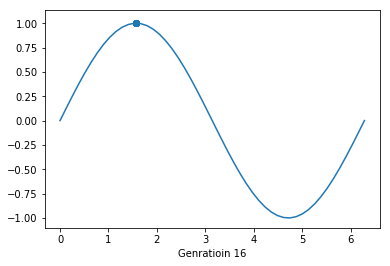

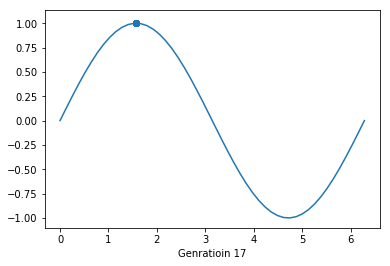

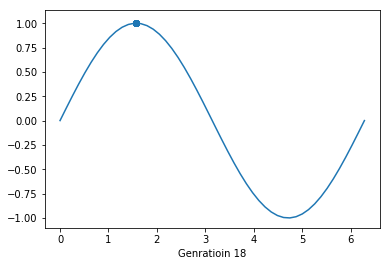

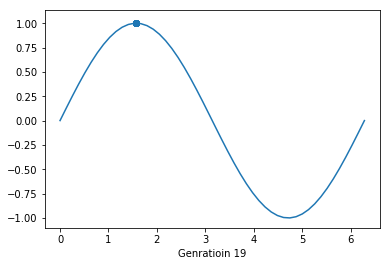

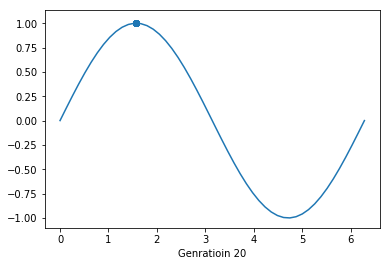

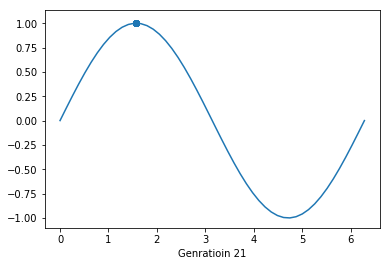

In [31]:
while 1:
    
    
    
    plot(A)
   # plt.savefig('min'+str(i)+'.png')
    global pre_best
    p=tornarment_selection(A)
    child=cross_over(A)
    
    type(child)
    mutation(child)
    my_list=my_list+child
    #sort by value
    my_list.sort(key = lambda t: t[1])

    my_list=my_list[40:]
    A=[my_list[i][0] for i in np.linspace(0,49,dtype=int)]
    A=np.array(A)
    A=A.reshape(1,50)
    
    best =my_list[49][1]
    if  math.fabs(best-pre_best)<0.00000000000000000000001 and  i>20:
        break;
    else:
   
        pre_best=best
    # Wait for 2 seconds
    plt.show()
    
    
    
 




